<h1><center>CMSC320: Intro to Data Science Tutorial</center></h1>

<h1>Introduction:</h1>
<p1>This tutorial will go over steps to parse through two different data sets and analyze their correlation. In this particular tutorial the two data sets used are temperature and energy usage data. The tempurature dataset measures temperature anomalies in the United States from the 1950-1981 average for each year and month from 1768 to 2013. The energy data set lists energy usage in the United States by industry over time from 1973-2012.</p1>
<br><br>
<p1><p1>Through out the tutorial various data science steps will be explained. These steps include Data Collection, Data Processing, Data analysis and visualization, machine learning and hypothesis testing, and Insight and policy. Through following these steps you will be able to make conclusions from this data in order to better understand the realtionship between temperature and energy usage.</p1></p1>

<h3>Tutorial Content:</h3>
<p1>The following sections will be covered in this tutorial:<p1/>
<ul>
<li>
<a href="#installing-libraries">Installing Libraries</a>
</li>
<li>
<a href="#loading-parsing">Loading and Parsing Data</a>
</li>
<li>
<a href="#data-processing">Data Processing</a>
</li>
<li>
<a href="#data-analysis-viz">Data Analysis and Visualization</a>
</li>
<li>
<a href="#ml-hyp-testing">Machine Learning and Hypothesis Testing</a>
</li>
<li>
<a href="#insight-policy">Insight and Policy</a>
</li>
</ul>

<h1 id='installing-libraries'>Installing Libraries:</h1>
<p1>The first step is to install the libraries that are imported below. To do this we used a package manager called anaconda. On Linux you can install anaconda by using this command:
</p1>
<pre>
<code> bash Anaconda3-4.3.1-Linux-x86_64.sh </code>
</pre>
<p1>Once anaconda is installed you can then install the libraires used in this project. The main libraries used are Pandas, Numpy, matplotlib, scipy, and sklearn. The commands below will install these libraires:</p1>
<pre>
<code>
conda install -c conda-forge matplotlib=2.0.2
conda install -c conda-forge scikit-learn=0.18.1
conda install -c conda-forge pandas=0.20.1
conda install -c conda-forge scipy=0.19.0
conda install -c conda-forge numpy=1.12.1
</code>
</pre>
<p1>The next step is to import the proper classes and methods. This is done below.</p1>

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model as lm
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

<h1 id='loading-parsing'>Loading and Parsing Data:</h1>
<p1>Both datasets are downloaded into the project folder, and can accessed HERE(LINK TO GITHUB). First, we will load the energy data. If you are not familiar with python pandas' library, there are a few built-in functions that make it extremely easy to read data into our dataframe.  The energy data is contained in an excel spreadsheet, so we will use Pandas.read_excel() method (code shown below) to parse our spreadsheet and get a dataframe.</p1>
<p1>When using read_excel, the first parameter we pass in is the path to our excel spreadsheet.  Our second parameter specifies which sheetname, from the excel file, we will be parsing.  The header parameter specifies where to start parsing from, in our case row 10 contains the column headers, so we start there.  Lastly, the skiprows parameter takes in a list of rows to skip in our spreadsheet; in other words, Pandas will ignore these rows when parsing.</p1>

In [2]:
#Read energy data in from excel spreadsheet
energy_data = pd.read_excel("Table_2.1_Energy_Consumption_by_Sector-2.xlsx", sheetname="Monthly Data", header=10, skiprows=[11])

energy_data.head(5)

,Month,Primary Energy Consumed by the Residential Sector,Total Energy Consumed by the Residential Sector,Primary Energy Consumed by the Commercial Sector,Total Energy Consumed by the Commercial Sector,Primary Energy Consumed by the Industrial Sector,Total Energy Consumed by the Industrial Sector,Primary Energy Consumed by the Transportation Sector,Total Energy Consumed by the Transportation Sector,Primary Energy Consumed by the Electric Power Sector,Energy Consumption Balancing Item,Primary Energy Consumption Total
0,1973-01-01,1313.816,1932.187,656.607,1079.310,2054.675,2701.524,1506.380,1509.552,1691.096,3.693,7226.265
1,1973-02-01,1150.011,1687.255,621.766,1001.920,1869.459,2460.752,1439.361,1442.127,1511.458,2.654,6594.709
2,1973-03-01,970.362,1497.067,490.154,884.437,1944.295,2579.613,1561.162,1564.016,1559.159,-0.934,6524.198
3,1973-04-01,709.631,1177.661,362.003,735.461,1924.207,2550.210,1479.971,1482.632,1470.152,-1.627,5944.336
4,1973-05-01,544.596,1015.008,289.109,696.114,2070.447,2741.810,1621.585,1624.436,1551.631,-2.817,6074.551


<p1>Congrats, you have succesfully read in the energy data contained in an excel spreadsheet!  Easy enough, right?  Now, if we take a look at our dataframe, we will see the column names are quite long.  We simplify these column names below, then print the first five rows with Dataframe.head(5)</p1>

In [3]:
#Change the column names, so they are shorter 
energy_data.columns = ["Month", "P.E. Residential", "T.E. Residential", "P.E. Commerical", "T.E. Commercial", 
                       "P.E. Industrial", "T.E. Industrial", "P.E. Transportation", "T.E. Transportation", 
                       "P.E. Electric", "Energy Consumption Balancing Item", "P.E. Total Consumption"]
energy_data.head(5)

,Month,P.E. Residential,T.E. Residential,P.E. Commerical,T.E. Commercial,P.E. Industrial,T.E. Industrial,P.E. Transportation,T.E. Transportation,P.E. Electric,Energy Consumption Balancing Item,P.E. Total Consumption
0,1973-01-01,1313.816,1932.187,656.607,1079.310,2054.675,2701.524,1506.380,1509.552,1691.096,3.693,7226.265
1,1973-02-01,1150.011,1687.255,621.766,1001.920,1869.459,2460.752,1439.361,1442.127,1511.458,2.654,6594.709
2,1973-03-01,970.362,1497.067,490.154,884.437,1944.295,2579.613,1561.162,1564.016,1559.159,-0.934,6524.198
3,1973-04-01,709.631,1177.661,362.003,735.461,1924.207,2550.210,1479.971,1482.632,1470.152,-1.627,5944.336
4,1973-05-01,544.596,1015.008,289.109,696.114,2070.447,2741.810,1621.585,1624.436,1551.631,-2.817,6074.551


<p1>Now, we repeat the same process for our temperature dataset. This dataset is a text file. Therefore, the numpy method Numpy.genfromtxt() is used to load the data. This method returns an ndarray, containing the data in our textfile. In order to turn it into a dataframe, we can then pass our ndarray object into the Pandas.DataFrame constructor to make our temperature DataFrame.</p1>

In [4]:
#loads the climate data
climateTable = np.genfromtxt('tempData.txt', skip_header=2)

#dataframe representing the climate data
climate_data = pd.DataFrame(climateTable, columns=['Year', 'Month', 'Monthly Anomaly', 'Monthly Uncertainty', 'Annual Anomaly', 'Annual Uncertainty', 'Five Year Anomaly', 'Five Year Uncertainty', 'Ten Year Anomaly', 'Ten Year Uncertainty', 'Twenty Year Anomaly', 'Twenty Year Uncertainty'])
climate_data.head(5)

,Year,Month,Monthly Anomaly,Monthly Uncertainty,Annual Anomaly,Annual Uncertainty,Five Year Anomaly,Five Year Uncertainty,Ten Year Anomaly,Ten Year Uncertainty,Twenty Year Anomaly,Twenty Year Uncertainty
0,1768.0,9.0,-0.850,2.880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1768.0,10.0,-1.578,3.386,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1768.0,11.0,-1.199,3.783,-0.471,2.380,NaN,NaN,NaN,NaN,NaN,NaN
3,1768.0,12.0,-0.522,4.979,-0.204,2.390,NaN,NaN,NaN,NaN,NaN,NaN
4,1769.0,1.0,0.118,4.856,-0.088,2.325,NaN,NaN,NaN,NaN,NaN,NaN


<h1 id='data-processing'>Data Processing:</h1>
<p1>The next step is to process the data. In this case we are going to merge our two dataframes (temperature and energy) into one data frame for easier access and comparison of data.
</p1>
<br><br>
<p1><p1>If you take a look back at the two dataframes below, you will see that date is used to identify unique rows in each dataframe.  More specifically, you will see these rows overlap.  We are going to try to use these dates to merge our dataframe.  Unfortunately, while one can see these dates overlap, they are not formatted the same in each dataframe.  As a result, the computer won't be able to recognize this intersection.  So, in order to merge our dataframes, we must first format the dates in a way that is consistent across both dataframes.  The easiest way to do this is to make use of Python's datetime object.</p1>

<p1>Our energy data luckily already makes use of datetime objects, so all we have to do is process our temperature data.  In order to do this, we first insert a "day" column to our temperature dataframe, initialized to all one's so it matches the energy dataset.  Then, we take the year, month, and day columns and copy them into a new dataframe.  We then call Pandas.to_datetime() to convert these fields into datetime objects.  Lastly, we insert a new column, called "Date" that contains these newly formatted date objects, then drop the old "Year", "Month", and "Date" columns.</p1>

In [5]:
#creates a new column in the format of year-month-day
climate_data['Day'] = np.ones(len(climate_data))
date = climate_data[['Year', 'Month', 'Day']].copy()
date = pd.to_datetime(date)
climate_data['Date'] = date

#drops the old date columns
climate_data = climate_data.drop('Year', axis=1)
climate_data = climate_data.drop('Month', axis=1)
climate_data = climate_data.drop('Day', axis=1)

#rearranges the columns
climate_data = climate_data[['Date', 'Monthly Anomaly', 'Monthly Uncertainty', 'Annual Anomaly',
       'Annual Uncertainty', 'Five Year Anomaly', 'Five Year Uncertainty',
       'Ten Year Anomaly', 'Ten Year Uncertainty', 'Twenty Year Anomaly',
       'Twenty Year Uncertainty']]

climate_data.head(5)

,Date,Monthly Anomaly,Monthly Uncertainty,Annual Anomaly,Annual Uncertainty,Five Year Anomaly,Five Year Uncertainty,Ten Year Anomaly,Ten Year Uncertainty,Twenty Year Anomaly,Twenty Year Uncertainty
0,1768-09-01,-0.850,2.880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1768-10-01,-1.578,3.386,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1768-11-01,-1.199,3.783,-0.471,2.380,NaN,NaN,NaN,NaN,NaN,NaN
3,1768-12-01,-0.522,4.979,-0.204,2.390,NaN,NaN,NaN,NaN,NaN,NaN
4,1769-01-01,0.118,4.856,-0.088,2.325,NaN,NaN,NaN,NaN,NaN,NaN


<p1>Now that the energy dataframe and climate dataframe have similar date columns, we can merge the two.  However, the way in which we choose to merge is key.  We perform an inner merge on our data; an inner merge takes the intersection of each dataframe, based on the specified keys.</p1>
<p1>Once we have merged our two dataframes into one, we change the row indexing to represent represent dates.  We change the index in our dataframe, because it allows us to easily look up data, based on date.</p1>
<p1>The resulting dataframe is stored in climate_energy_data variable.  The first five rows of climate_energy_data are printed below.</p1>

In [6]:
#merges the two dataframes on the date
climate_energy_data = pd.merge(energy_data, climate_data, left_on = 'Month', right_on = 'Date')

#Reindex the dataset, so indices are Datetime objects
climate_energy_data = climate_energy_data.set_index(["Month"])
climate_energy_data = climate_energy_data.drop('Date', axis=1)
climate_energy_data.index.name = None

climate_energy_data.head(5)

,P.E. Residential,T.E. Residential,P.E. Commerical,T.E. Commercial,P.E. Industrial,T.E. Industrial,P.E. Transportation,T.E. Transportation,P.E. Electric,Energy Consumption Balancing Item,...,Monthly Anomaly,Monthly Uncertainty,Annual Anomaly,Annual Uncertainty,Five Year Anomaly,Five Year Uncertainty,Ten Year Anomaly,Ten Year Uncertainty,Twenty Year Anomaly,Twenty Year Uncertainty
1973-01-01,1313.816,1932.187,656.607,1079.310,2054.675,2701.524,1506.380,1509.552,1691.096,3.693,...,-0.470,0.297,-0.266,0.054,-0.177,0.047,-0.101,0.024,-0.017,0.025
1973-02-01,1150.011,1687.255,621.766,1001.920,1869.459,2460.752,1439.361,1442.127,1511.458,2.654,...,0.130,0.246,-0.263,0.046,-0.189,0.041,-0.114,0.024,-0.012,0.024
1973-03-01,970.362,1497.067,490.154,884.437,1944.295,2579.613,1561.162,1564.016,1559.159,-0.934,...,1.555,0.279,-0.244,0.049,-0.198,0.038,-0.123,0.025,-0.013,0.024
1973-04-01,709.631,1177.661,362.003,735.461,1924.207,2550.210,1479.971,1482.632,1470.152,-1.627,...,-0.842,0.178,-0.124,0.046,-0.172,0.036,-0.115,0.026,-0.021,0.024
1973-05-01,544.596,1015.008,289.109,696.114,2070.447,2741.810,1621.585,1624.436,1551.631,-2.817,...,-0.408,0.313,-0.012,0.050,-0.181,0.035,-0.108,0.026,-0.027,0.023


<h1 id='data-analysis-viz'>Data Analysis and Visualization:</h1>
<p1>Our next step is to visualize the energy and temperature data.  Often times, it is easier for us to gain insight into our dataset, or the problems we are trying to solve, by visualizing them.  For example, a simple graph can give insights into trends and clusters within the data.  This insight is extremely useful for analysis.  We are going to make several graphs, showing trends in our energy and temperature data.  To do so, we will rely upon Python's matplotlib library.</p1>

<p1>First we will make several plots showing the distribution of our energy dataset over time. But, before we do so, we define a method <code>getAvgs</code> that will make our job a little easier.  This method takes in a dataframe, and a sector S, and calculates the average energy usage per year, over sector S.  The returned result is a list of averages, over the relevant years 1973 - 2013.</p1

In [7]:
#Gets the monthly average in Energy Usage for a sector over time.
#If no sector is specified, it computes monthly averages for total energy consumption (across all sectors)
def getAvgs(df, sector = None):
    if( sector == None):
        sector = "P.E. Total Consumption"
    elif( sector == "Electric"):
         sector = "P.E. Electric"
    else:
        sector = "T.E. " + sector
    
    avgs = np.zeros( 2013 - 1973 + 1)
    for i in range(1973, 2014):
        temp = df[str(i)]

        sum = np.sum(temp[sector].values)
        avgs[i-1973] = sum / float(len(temp))
        
    return avgs

<p1>Now, we define a method <code>graph</code> to make it easier to graph our data, and avoid reusing code.  Our method takes in a list of X coordinates, Y coordinates, X-axis and Y-axis labels, and the type of plot to make (options are \"Line\" or \"Scatter\" plots.  It then produces the specified type of plot, with a line of best fit.</p1>

In [8]:
#Graphs X and Y datapoints, and sets the title, xLabel, and yLabel
#t is the type of graph.  Currently, Line Graphs and Scatter Plots have been implemented.
def graph(X, Y, title, xLabel, yLabel, t="Line"):
    if( t == "Line"):
        plt.plot(X, Y, label = "Data Points")
    elif( t == "Scatter"):
        plt.scatter(X, Y, label="Data Points")
        
    plt.plot(X, np.poly1d(np.polyfit(X, Y, 1))(np.unique(X)), label="Best Fit Line")
    slope, intercept = np.polyfit(X, Y, 1)
    plt.legend(loc=0)
    plt.title(title)
    plt.xlabel(xLabel)
    plt.ylabel(yLabel)
    plt.show()
    print("Slope of the line of best fit is: %f" %slope)

<p>Using our methods above, we can easily compute and graph the yearly average in total monthly energy usage.</p>

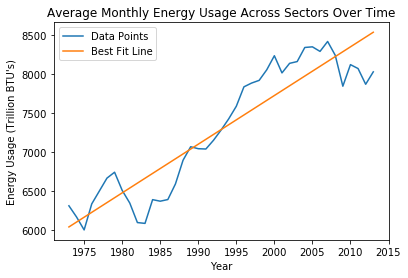

Slope of the line of best fit is: 62.529150


In [9]:
#Plot average monthly energy usage per year over time
avgs = getAvgs(climate_energy_data)
years = np.arange(1973, 2014)

graph(years, avgs, "Average Monthly Energy Usage Across Sectors Over Time", "Year", "Energy Usage (Trillion BTU's)")

<p1>Above we plotted the total average energy usage across all industries. In analyzing this graph and line or best fit it is clear that there is a direct relationship between energy usage and time. This means that as society has evolved the United States of America, energy usage has consistently increased. 
<br /><br />
Next we will create similar graphs for each industry, by computing the yearly averge in monthly energy usage for each industry.</p1>

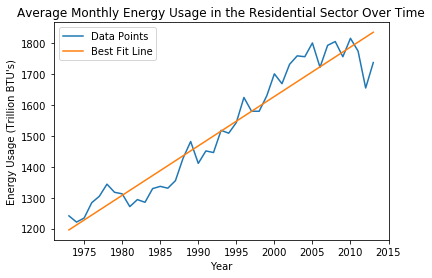

Slope of the line of best fit is: 16.002637


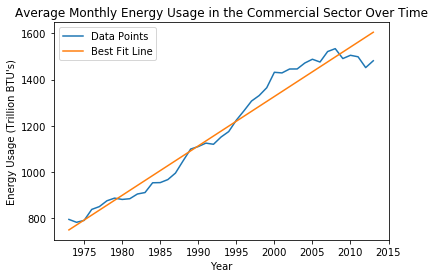

Slope of the line of best fit is: 21.360539


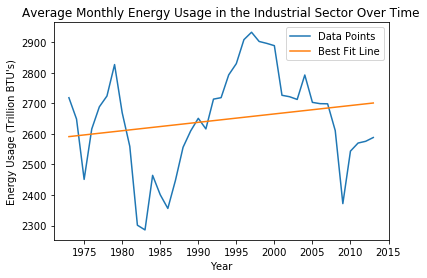

Slope of the line of best fit is: 2.751618


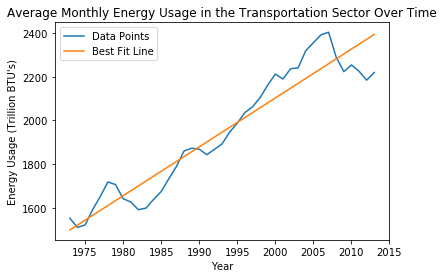

Slope of the line of best fit is: 22.419588


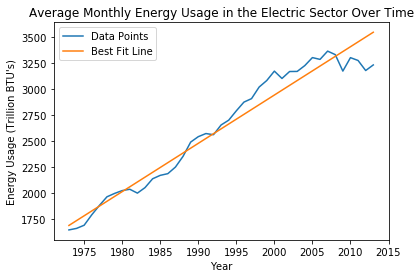

Slope of the line of best fit is: 46.465518


In [10]:
#Compute monthly averages for each individual sector
sectors = ["Residential", "Commercial", "Industrial", "Transportation", "Electric"]

for s in sectors:
    avgs = getAvgs(climate_energy_data, s)
    graph(years, avgs, "Average Monthly Energy Usage in the " + s + " Sector Over Time", "Year", 
          "Energy Usage (Trillion BTU's)")

<p1>As you can see from these graphs, most industries show a direct correlation between energy usage and time.  With the exception of the industrial industry, we can clearly see energy increasing along with time.</p1>
<br /><br />
<p1>Now, we are going to move on to our temperature data.  We are going to use our original temperature dataframe, instead of our merged climate_energy_data dataframe.  The reason we do this is because we are going to make two different plots - one over our merged domain (1973-2013) and another plot over our entire temperature domain.</p1>
<br />
<p1>To get started, we first do a quick indexing trick on our climate_data dataframe.  We change the index so it is a datetime, similar to before, in order to allow us to easily access data based on temporal characteristics.
<br /><br />
Next, we define a method called <code>getAnomalies</code> that functions similar to our <code>getAvgs</code> function.  Next, we get the specific annual temperature anomalies, for each year in our defined range.  Lastly, we return a list of our anomalies and all the years for which we have aggregated data."</p1>

In [11]:
climate_data = climate_data.set_index(['Date'])
climate_data.index.name = None

In [12]:
def getAnomalies(start, end):
    end = end + 1
    anomalies = np.zeros(end - start)
    years = np.arange(start, end)

    for y in range(start, end):
        d = str(y) + '-06'
        anomalies[y - start] = climate_data[d]['Annual Anomaly']
    return anomalies, years

<p>Great job!  Now, we will make use of our <code>getAnomalies</code> method.  We pass in 1973 and 2012, as start and end parameters respectively, to tell our method to get all anomalies during this time period.  We then plot the returned lists by using our previously defined <code>graph</code> function.  Both the code to produce this and the resulting plot can be seen below.</p>

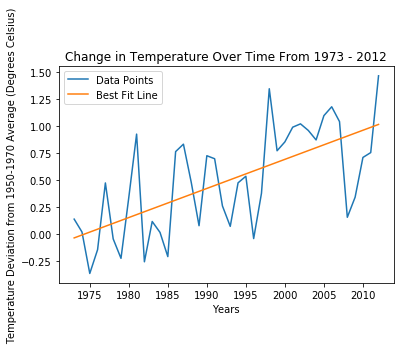

Slope of the line of best fit is: 0.026938


In [14]:
anomalies, years = getAnomalies(1973, 2012)

graph(years, anomalies, "Change in Temperature Over Time From 1973 - 2012", "Years", 
      "Temperature Deviation from 1950-1970 Average (Degrees Celsius)")

<p>As you can see from the plot above, there is a similar positive trend between temperature and time.  As time increases, so does temperature.  However, because of the variance of the plot, one might reasonably question the strength of this relationship.  With temperature anomaly constantly jumping up and down, can we definitively say that time is causing temperature to increase?</p>
<br />
<p>The answer to this question becomes more apparent below, when we expand our effective domain.  If we extend our time period farther back, to 1820, we can more clearly see a stronger relationship between time and temperature.</p>

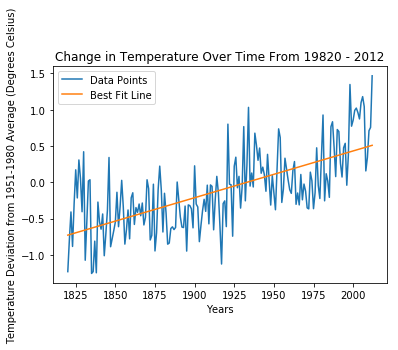

Slope of the line of best fit is: 0.006442


In [15]:
anomalies, years = getAnomalies(1820, 2012)

graph(years, anomalies, "Change in Temperature Over Time From 19820 - 2012", "Years", 
      "Temperature Deviation from 1951-1980 Average (Degrees Celsius)")

<p1>Now, we can see a nice trend upwards between temperature anomaly and time.  As a result, we can now reasonably conclude that: as date increases, so does temperature.</p1>
<br><br>

# Hypothesis Testing and Machine Learning\n",
    "\n",
    "<p>Now, we are going to delve deeper into the hypothesis testing and machine learning aspects of data science.  Through data visualization and analysis, we were able to show that temperature and energy usage both increase with time.  From this, we would now like to hypothesize that temperature and energy usage are directly correlated (i.e. an increase in one leads to an increase in the other).  Being able to prove such a hypothesis would give key insight into global warming and how to combat it.</p>\n",
    "<br />\n",
    "\n",
    "<p>We are going to start by taking our hypothesis and calculating the pearson correlation coefficient for our temperature and energy data.  If you are unfamiliar with what this coefficient is, or what it means, then check out this <a href = \"https://en.wikipedia.org/wiki/Pearson_correlation_coefficient\">Wikipedia page</a>.  Luckily for us, there is a well defined stats library in scipy that can help us calculate this in one line: </p>"

In [ ]:
stats.pearsonr(climate_energy_data['P.E. Total Consumption'], climate_energy_data['Monthly Anomaly'])

In [ ]:
avgs = getAvgs(climate_energy_data)
avgs = avgs[1:41]
anomalies, years = getAnomalies(1973, 2012)

graph(avgs, anomalies, "Anomalies and Energy Consumption", "Energy Consumption", 
      "Yearly Temp Anomalies")

<p1>Lastly, we attempted to graph the termperature data with respect to the energy consumption. This graph clearly shows that the two datasets are not linearly correlated. Originally, we had predicted that there would be a linear relationship between the amount of energy used and the rise in temperature.<p1>

<h1 id='ml-hyp-testing'>Machine Learning and Hypothesis Testing:</h1>

In [ ]:
def trainTestSplit(X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
    
    return X_train, X_test, Y_train, Y_test

In [ ]:
def linear_model(X, Y):

    #creates the linear regression model
    reg = lm.LinearRegression()
    reg.fit(X, Y)
    
    return reg

In [ ]:
total_data = climate_energy_data.dropna()

X = np.c_[total_data.index.year, total_data.index.month, total_data.index.day]
Y = total_data['P.E. Total Consumption'].values

X_train, X_test, Y_train, Y_test = trainTestSplit(X, Y)

energy_reg = linear_model(X_train, Y_train)

In [ ]:
Yhat = energy_reg.predict(X_test)

In [ ]:
def getLoss(Ytrue, Yhat):
    return (Yhat - Ytrue)**2

In [ ]:
def plotLoss(loss, avg_loss):
    N = len(loss)
    X = np.arange(N) + 1
    
    plt.scatter(X, loss)
    plt.plot(X, np.ones(N) * avg_loss, label="Average Loss", c="red", linewidth=2.0)
    plt.title("Squared Loss")
    plt.ylabel("Loss value")
    plt.legend(loc=0)
    plt.show()

In [ ]:
loss = getLoss(Y_test, Yhat)
totalLoss = np.sum(loss)

avg_loss = mean_squared_error(Y_test, Yhat)

print("Total Loss: %s" % totalLoss)
print("Test accuracy: %s" % avg_loss)
plotLoss(loss, avg_loss)

In [ ]:
Y = total_data['Monthly Anomaly'].values
X_test, X_train, Y_test, Y_train = trainTestSplit(X, Y)

temp_reg = linear_model(X_train, Y_train)

In [ ]:
Yhat = temp_reg.predict(X_test)

In [ ]:
loss = getLoss(Y_test, Yhat)
totalLoss = np.sum(loss)

avg_loss = mean_squared_error(Y_test, Yhat)

print("Total Loss: %s" % totalLoss)
print("Test accuracy: %s" % avg_loss)
plotLoss(loss, avg_loss)

<h1 id='insight-policy'>Insight and Policy:</h1>
<p1>Maybe Need a conclusion idk if this is the same thing</p1>